## Time series Analysis

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

df_time = pd.DataFrame({'Value':['100','78','129'] , 'Date':['02/20/2015','01/15/2016','08/21/2015']})

In [14]:
df_time

,Value,Date
0,100,02/20/2015
1,78,01/15/2016
2,129,08/21/2015


In [15]:
# sort based on time
df_time.sort_values(by=['Date'])

,Value,Date
1,78,01/15/2016
0,100,02/20/2015
2,129,08/21/2015


In [17]:
df_time["Date"] = pd.to_datetime(df_time['Date'])

In [10]:
df_time.sort_values(by=['Date'])

,Value,Date
0,100,2015-02-20
2,129,2015-08-21
1,78,2016-01-15


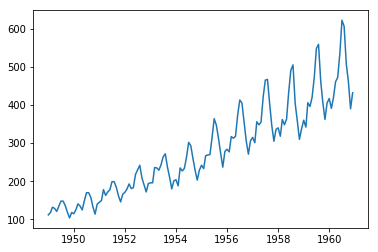

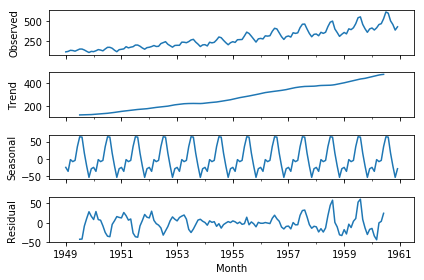

In [19]:

# Load and plot passaenger time series
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
plt.plot(df['Month'], df['#Passengers'])
plt.show()

# Apply decompostion analysis to the time series
df  = df.set_index(['Month'])
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decomposition.plot()
plt.show()

## Activity: Time Series Sampling and Smoothing on Apple dataset
#### Task: Plot the "Close", which is stock market price at closing time (5:30 p.m. NY time), its sampled version and its smoothed version. Steps: 1- Load and plot Apple Stock Market dataset: Hint:

In [22]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Tick
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,0
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,1
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,2
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,3
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,4


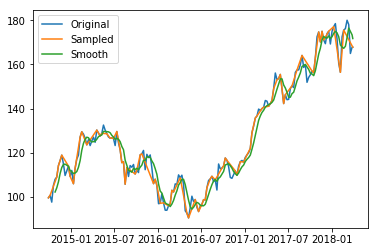

In [38]:
# Original the dataset
data = pd.read_csv('AAPL.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Tick'] = range(0, len(data))
plt.plot(data['Date'], data['Close'], label="Original")
# plt.show()

# Sample the dataset
data_one_half = data.sample(frac=0.5)
data_one_half = data_one_half.sort_values(by=['Tick'])
plt.plot(data_one_half['Date'], data_one_half['Close'], label='Sampled')

# Smooth the dataset

data['Rolling_Mean']  = data['Close'].rolling(window=5).mean()
plt.plot(data['Date'], data['Rolling_Mean'], label='Smooth')

# plot them all
plt.legend()
plt.show()